In [40]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime as dt

In [51]:
data = yf.download('INREUR=X', start='2017-12-22', end='2022-12-23')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-22,0.013170,0.013200,0.013050,0.013160,0.013160,0
2017-12-25,0.013000,0.013160,0.013000,0.013160,0.013160,0
2017-12-26,0.013160,0.013160,0.013130,0.013160,0.013160,0
2017-12-27,0.013150,0.013150,0.013070,0.013150,0.013150,0
2017-12-28,0.013090,0.013100,0.013040,0.013090,0.013090,0
...,...,...,...,...,...,...
2022-12-16,0.011111,0.011394,0.011111,0.011352,0.011352,0
2022-12-19,0.011410,0.011426,0.011343,0.011410,0.011410,0
2022-12-20,0.011401,0.011414,0.011344,0.011400,0.011400,0


In [54]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.0
mean,0.012083,0.012130,0.012042,0.012088,0.012088,0.0
std,0.000545,0.000548,0.000540,0.000544,0.000544,0.0
min,0.010954,0.011036,0.010954,0.011004,0.011004,0.0
25%,0.011585,0.011623,0.011551,0.011588,0.011588,0.0
50%,0.012152,0.012207,0.012098,0.012157,0.012157,0.0
75%,0.012545,0.012602,0.012500,0.012548,0.012548,0.0
max,0.013170,0.013200,0.013140,0.013160,0.013160,0.0


In [46]:
t = dt.datetime(2017, 1, 1) # setting the date. Optional line.
en = dt.datetime(2022, 1, 1) # setting the date. Optional line.

In [47]:
data['Log returns'] = np.log(data['Close']/data['Close'].shift())

Text(0.5, 1.0, 'Price')

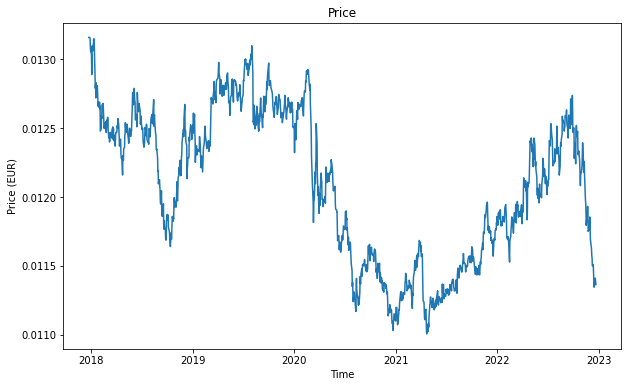

In [50]:
fig = plt.figure(figsize=(10,6))
plt.plot(data['Adj Close'])
plt.xlabel('Time')
plt.ylabel('Price (EUR)')
plt.title('Price')

Text(0.5, 1.0, 'Volatility')

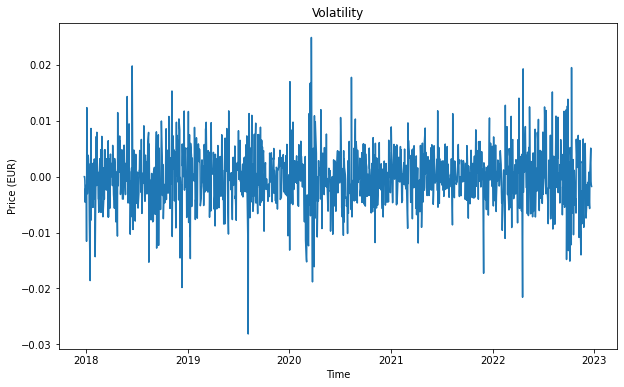

In [48]:
fig = plt.figure(figsize=(10,6))
plt.plot(data['Log returns'])
plt.xlabel('Time')
plt.ylabel('Price (EUR)')
plt.title('Volatility')

Iteration:      1,   Func. Count:      5,   Neg. LLF: 10095.680650659218
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2087.265377855626
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1008.3718969460975
Iteration:      4,   Func. Count:     27,   Neg. LLF: 613719.4307777248
Iteration:      5,   Func. Count:     32,   Neg. LLF: 980.3471504521306
Iteration:      6,   Func. Count:     36,   Neg. LLF: 980.3235824067332
Iteration:      7,   Func. Count:     40,   Neg. LLF: 980.3213274307587
Iteration:      8,   Func. Count:     44,   Neg. LLF: 980.3213187373892
Iteration:      9,   Func. Count:     47,   Neg. LLF: 980.3213187376496
Optimization terminated successfully    (Exit mode 0)
            Current function value: 980.3213187373892
            Iterations: 9
            Function evaluations: 47
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:              

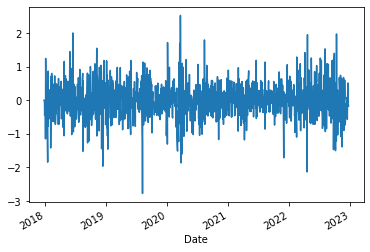

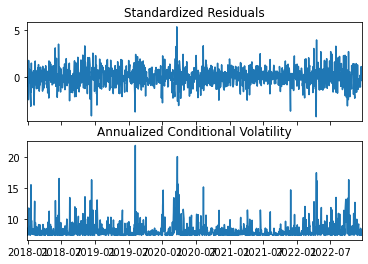

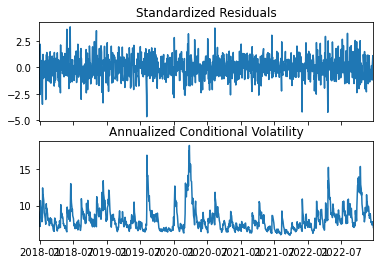

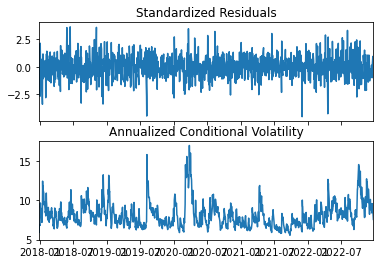

In [49]:
market = data["Adj Close"]

returns = 100 * market.pct_change().dropna() # generating return series
ax = returns.plot() # ploting the data

#xlim = ax.set_xlim(returns.index.min(), returns.index.max())

# Estimating a GARCH and ARCH models
from arch import arch_model

model1 = arch_model(returns, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())

model2 = arch_model(returns, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs

# Estimating TGARCH

model3= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs

In [58]:
from arch import arch_model

model1 = arch_model(returns, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 10095.680650659218
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2087.265377855626
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1008.3718969460975
Iteration:      4,   Func. Count:     27,   Neg. LLF: 613719.4307777248
Iteration:      5,   Func. Count:     32,   Neg. LLF: 980.3471504521306
Iteration:      6,   Func. Count:     36,   Neg. LLF: 980.3235824067332
Iteration:      7,   Func. Count:     40,   Neg. LLF: 980.3213274307587
Iteration:      8,   Func. Count:     44,   Neg. LLF: 980.3213187373892
Iteration:      9,   Func. Count:     47,   Neg. LLF: 980.3213187376496
Optimization terminated successfully    (Exit mode 0)
            Current function value: 980.3213187373892
            Iterations: 9
            Function evaluations: 47
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:              

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15189.847068566247
Iteration:      2,   Func. Count:     15,   Neg. LLF: 685731.2778673753
Iteration:      3,   Func. Count:     22,   Neg. LLF: 982.3597397973613
Iteration:      4,   Func. Count:     28,   Neg. LLF: 992.3069521734872
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1007.3063463539802
Iteration:      6,   Func. Count:     43,   Neg. LLF: 957.1961872344398
Iteration:      7,   Func. Count:     48,   Neg. LLF: 957.1958852742719
Iteration:      8,   Func. Count:     52,   Neg. LLF: 957.1958852745079
Optimization terminated successfully    (Exit mode 0)
            Current function value: 957.1958852742719
            Iterations: 8
            Function evaluations: 52
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:  

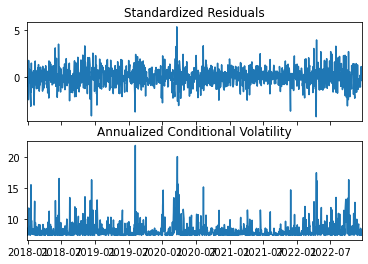

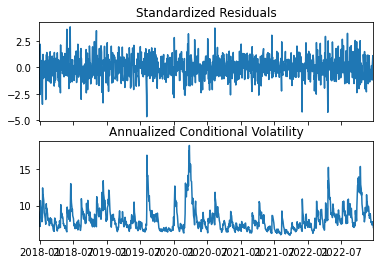

In [59]:
model2 = arch_model(returns, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6977.569610065114
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4839.122927612967
Iteration:      3,   Func. Count:     26,   Neg. LLF: 6242.127113479617
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1509.4866363731967
Iteration:      5,   Func. Count:     42,   Neg. LLF: 968.5117069128917
Iteration:      6,   Func. Count:     49,   Neg. LLF: 978.1982788087365
Iteration:      7,   Func. Count:     56,   Neg. LLF: 968.503646122603
Iteration:      8,   Func. Count:     63,   Neg. LLF: 994.8699689447371
Iteration:      9,   Func. Count:     70,   Neg. LLF: 967.469081038051
Iteration:     10,   Func. Count:     77,   Neg. LLF: 958.0750957315263
Iteration:     11,   Func. Count:     84,   Neg. LLF: 956.7077296706992
Iteration:     12,   Func. Count:     91,   Neg. LLF: 956.5154084034125
Iteration:     13,   Func. Count:     97,   Neg. LLF: 956.4970221757004
Iteration:     14,   Func. Count:    103,   Neg. LLF: 956.4968021

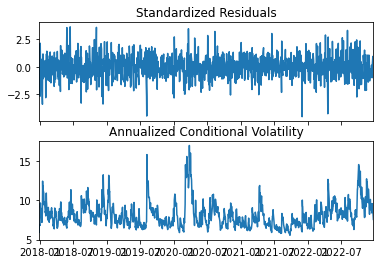

In [60]:
# Estimating TGARCH

model3= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs